In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For notebook visuals
%matplotlib inline
sns.set(style="whitegrid", palette="viridis", font_scale=1.1)

# ------------------------------------------------------
# 1️⃣ Load Dataset
# ------------------------------------------------------
# Replace this path with your actual dataset path
df = pd.read_csv("../data/chennai_accidents.csv")

# Display first few rows
df.head()


,accident_id,city,date,time,day_of_week,location,latitude,longitude,road_type,vehicle_type,weather,light_condition,accident_severity,num_vehicles_involved,num_casualties,speed_limit,traffic_density,weather_temp_c,risk_score
0,1,Chennai,2024-04-27,20:26,Saturday,OMR,12.875689,80.226002,Urban Road,Two-Wheeler,Clear,Day,Minor,1,0,80,High,29.0,0.58
1,2,Chennai,2024-01-06,13:01,Friday,Velachery Main Road,12.985553,80.216464,Urban Road,Two-Wheeler,Clear,Day,Serious,2,2,60,Low,28.1,0.27
2,3,Chennai,2025-09-04,13:37,Saturday,Anna Salai,13.064602,80.234302,National Highway,Two-Wheeler,Rainy,Night-Streetlit,Minor,3,0,50,Low,33.5,0.64
3,4,Chennai,2025-09-13,16:04,Wednesday,GST Road,12.918391,80.127295,State Highway,Two-Wheeler,Clear,Day,Minor,3,5,60,High,31.3,0.63
4,5,Chennai,2024-10-22,23:15,Monday,Velachery Main Road,12.986663,80.217286,Urban Road,Two-Wheeler,Rainy,Night,Minor,2,1,80,High,29.0,1.00


In [6]:
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isna().sum())
print("\nColumn datatypes:\n", df.dtypes)


Dataset shape: (1500, 19)

Missing values:
 accident_id              0
city                     0
date                     0
time                     0
day_of_week              0
location                 0
latitude                 0
longitude                0
road_type                0
vehicle_type             0
weather                  0
light_condition          0
accident_severity        0
num_vehicles_involved    0
num_casualties           0
speed_limit              0
traffic_density          0
weather_temp_c           0
risk_score               0
dtype: int64

Column datatypes:
 accident_id                int64
city                      object
date                      object
time                      object
day_of_week               object
location                  object
latitude                 float64
longitude                float64
road_type                 object
vehicle_type              object
weather                   object
light_condition           object
accident_sever

Top Important Features:
                  Feature  Importance
8        traffic_density    0.321050
5        light_condition    0.243718
3           vehicle_type    0.233368
4                weather    0.148289
1              longitude    0.013293
0               latitude    0.013197
9         weather_temp_c    0.012143
7            speed_limit    0.004739
2              road_type    0.004195
6  num_vehicles_involved    0.003183


/var/folders/ct/mv4sq3sd25sf5ysgl670kf800000gn/T/ipykernel_49856/2869780796.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df.head(10), palette="coolwarm")


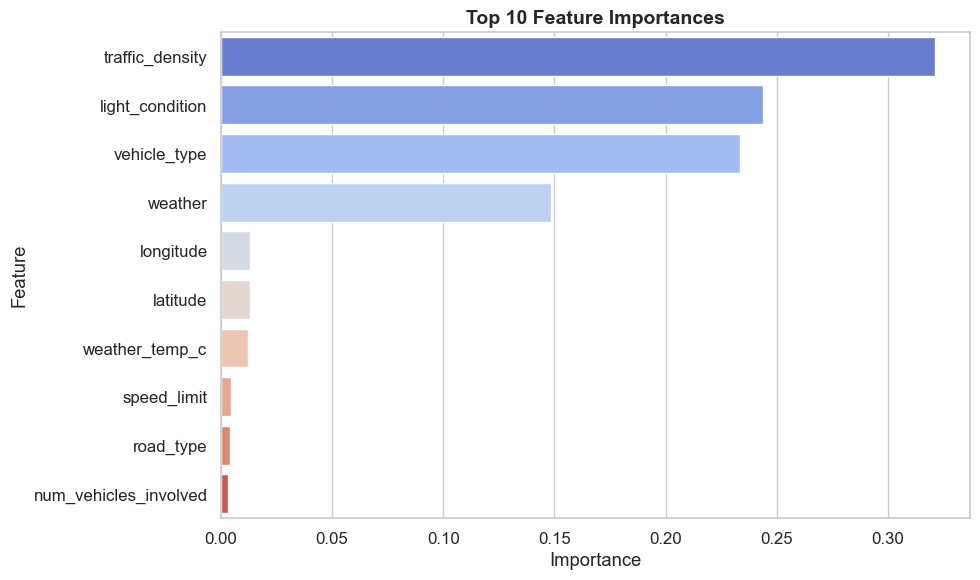

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load model
model = joblib.load("../models/risk_model.pkl")

# Load data
df = pd.read_csv("../data/preprocessed_accidents.csv")

# Drop target if present
target_col = "risk_score"
if target_col in df.columns:
    X = df.drop(columns=[target_col])
else:
    X = df

# Ensure feature list alignment
model_features = getattr(model, "feature_names_in_", X.columns)
importances = model.feature_importances_

# Match array lengths safely
min_len = min(len(model_features), len(importances))
importance_df = pd.DataFrame({
    "Feature": model_features[:min_len],
    "Importance": importances[:min_len]
}).sort_values(by="Importance", ascending=False)

# Display and plot
print("Top Important Features:\n", importance_df.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df.head(10), palette="coolwarm")
plt.title("Top 10 Feature Importances", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()
